# **Time-Series Forecasting Study Sheet**

---

## **1. Models for Time-Series Forecasting**

### **1.1 Time-Series Regression Models**  
- Statistical methods for forecasting future values based on historical data.  
- Includes **Linear Regression**, **Least Squares Estimation**, and **Nonlinear Regression**.  

### **1.2 Exponential Smoothing**  
- A smoothing technique that improves prediction accuracy by reducing the impact of noise and outliers.  
- Uses an **exponential weighting function** to give more importance to recent observations.  

### **1.3 ARIMA Models** *(AutoRegressive Integrated Moving Average)*  
- Combines an **autoregressive** model (past observations) and a **moving average** model (past forecast errors).  
- **Best for:** Stationary time series with clear trends and seasonality.  

### **1.4 SARIMA Models** *(Seasonal ARIMA)*  
- An extension of ARIMA that incorporates **seasonal patterns** using seasonal autoregression and moving average terms.  
- **Best for:** Seasonal time series with external variables.  

### **1.5 Random Forest & Gradient Boosting**  
- Tree-based ensemble models (e.g., **Random Forest**, **XGBoost**, **LightGBM**) that capture nonlinear relationships.  
- **Best for:** Feature-engineered time series with lagged values, rolling statistics, and external variables.  

### **1.6 Neural Networks**  
- Powerful tools for modeling complex, nonlinear relationships in time series.  
- Suitable for both **classification** and **forecasting** tasks.  

### **1.7 Long Short-Term Memory (LSTM)**  
- A type of recurrent neural network (RNN) that captures **long-term dependencies** in sequential data.  
- **Best for:** Complex time series with long-term dependencies and nonlinear patterns.  

### **1.8 Support Vector Machines (SVM)**  
- Can perform classification or regression on time series when paired with effective feature engineering.  
- **Best for:** Time series classification tasks with well-designed features.  

---

## **2. Feature Engineering for Time Series**

Feature engineering is critical for improving the performance of **non-deep-learning models**:

- **Lag Features:** Use previous values of the target variable as predictors.  
- **Rolling Statistics:** Add moving averages, standard deviations, and rolling trends.  
- **Seasonality Indicators:** Include time-based features such as day of the week, month, or quarter.  
- **External Variables:** Incorporate additional relevant data (e.g., weather, economic indicators, events).  

---
## **3. Evaluation Metrics**

- Mean Absolute Error (MAE):
   - Measures the average magnitude of errors.
- Mean Squared Error (MSE):
   - Penalizes larger errors more heavily.
- Mean Absolute Percentage Error (MAPE):
    - Expresses errors as a percentage of actual values.
- R² (Coefficient of Determination):
   - Measures the proportion of variance explained by the model.

---

### **Example**

**About Data**
- Daily COVID-19 case data from January 22, 2020 to July 24, 2020 obtained from the Johns Hopkins Coronavirus Resource Center.
- Source Code: https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

Data Overview

In [61]:
raw_data= pd.read_csv("confirmed_global(1).xls")
raw_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,4,4,4,4,5,7,8,11,12,13,15,16,18,20,24,25,29,30,34,41,43,76,80,91,107,118,146,175,197,240,275,300,338,368,424,445,485,532,556,608,666,715,785,841,907,934,997,1027,1093,1177,1236,1331,1464,1532,1704,1830,1940,2127,2291,2470,2705,2895,3225,3393,3564,3781,4042,4403,4687,4968,5227,5640,6054,6403,6665,7073,7654,8146,8677,9219,

In [62]:
pd.set_option('display.max_columns', None)

In [5]:
raw_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,4,4,4,4,5,7,8,11,12,13,15,16,18,20,24,25,29,30,34,41,43,76,80,91,107,118,146,175,197,240,275,300,338,368,424,445,485,532,556,608,666,715,785,841,907,934,997,1027,1093,1177,1236,1331,1464,1532,1704,1830,1940,2127,2291,2470,2705,2895,3225,3393,3564,3781,4042,4403,4687,4968,5227,5640,6054,6403,6665,7073,7654,8146,8677,9219,

In [6]:
#size of the data
raw_data.shape

(274, 449)

In [7]:
#statistical overview of data
raw_data.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
count,273.000000,273.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.0

In [12]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 449 entries, Province/State to 4/10/21
dtypes: float64(2), int64(445), object(2)
memory usage: 961.3+ KB


**Data Exploration and Analysis**

In [63]:
time_series_data = raw_data.copy()

In [64]:
time_series_data= time_series_data.drop(columns=['Province/State', 'Lat', 'Long'], axis=1)

In [65]:
time_series_data = time_series_data.melt(
    id_vars=['Country/Region'],
    var_name='Date',
    value_name='Confirmed_Cases'
)

time_series_data['Date'] = pd.to_datetime(time_series_data['Date'])
time_series_data.set_index('Date', inplace=True)


C:\Users\pales\AppData\Local\Temp\ipykernel_24400\729143931.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_series_data['Date'] = pd.to_datetime(time_series_data['Date'])


In [66]:
time_series_data.head()

,Country/Region,Confirmed_Cases
Date,,
2020-01-22,Afghanistan,0
2020-01-22,Albania,0
2020-01-22,Algeria,0
2020-01-22,Andorra,0
2020-01-22,Angola,0


In [67]:
#size of the converted time series data
time_series_data.shape

(121930, 2)

In [26]:
time_series_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121930 entries, 2020-01-22 to 2021-04-10
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Country/Region   121930 non-null  object
 1   Confirmed_Cases  121930 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ MB


In [68]:
#statistical summary of the dataset
time_series_data.describe()

,Confirmed_Cases
count,1.219300e+05
mean,1.532548e+05
std,1.074238e+06
min,0.000000e+00
25%,7.200000e+01
50%,1.111000e+03
75%,2.034500e+04
max,3.115150e+07


In [69]:
#checking for duplicates
time_series_data.duplicated().sum()

55869

In [70]:
#since there are duplicates, we can check which rows are duplicated
time_series_data[time_series_data.duplicated()]

,Country/Region,Confirmed_Cases
Date,,
2020-01-22,Australia,0
2020-01-22,Australia,0
2020-01-22,Australia,0
2020-01-22,Australia,0
2020-01-22,Australia,0
...,...,...
2021-04-10,United Kingdom,4277
2021-04-10,United Kingdom,1574
2021-04-10,United Kingdom,20


In [71]:
#the number of duplicated values is huge hence we are not going to drop them but rather sum them up for each country 
time_series_data = time_series_data.groupby(['Country/Region', 'Date']).sum().reset_index()


In [72]:
time_series_data.duplicated().sum()

0

In [73]:
#checking for missing values
time_series_data.isnull().sum()

Country/Region     0
Date               0
Confirmed_Cases    0
dtype: int64

In [74]:
time_series_data['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [75]:
#zooming into South Africa
south_africa_data = time_series_data[time_series_data['Country/Region'] == 'South Africa']

In [76]:
south_africa_data.head()

,Country/Region,Date,Confirmed_Cases
71200,South Africa,2020-01-22,0
71201,South Africa,2020-01-23,0
71202,South Africa,2020-01-24,0
71203,South Africa,2020-01-25,0
71204,South Africa,2020-01-26,0


In [77]:
south_african_data=south_africa_data.drop(columns=['Country/Region'], inplace=True)

C:\Users\pales\AppData\Local\Temp\ipykernel_24400\992490004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_african_data=south_africa_data.drop(columns=['Country/Region'], inplace=True)


In [78]:
#set the index to Date
south_africa_data.set_index('Date', inplace=True)

In [79]:
south_africa_data.head()

,Confirmed_Cases
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0


In [80]:
south_africa_data.describe()

,Confirmed_Cases
count,4.450000e+02
mean,6.016890e+05
std,5.516380e+05
min,0.000000e+00
25%,1.135000e+04
50%,6.270410e+05
75%,9.219220e+05
max,1.557527e+06


In [81]:
south_africa_data.shape

(445, 1)

**Decomposition**

In [82]:
#july 2020 data
south_africa_data_july = south_africa_data.loc['2020-07-01':'2020-07-31']

In [87]:
south_africa_data_july.head()

,Confirmed_Cases
Date,
2020-07-01,159333
2020-07-02,168061
2020-07-03,177124
2020-07-04,187977
2020-07-05,196750


In [83]:
decomposition = seasonal_decompose(south_africa_data_july ['Confirmed_Cases'], model='additive')

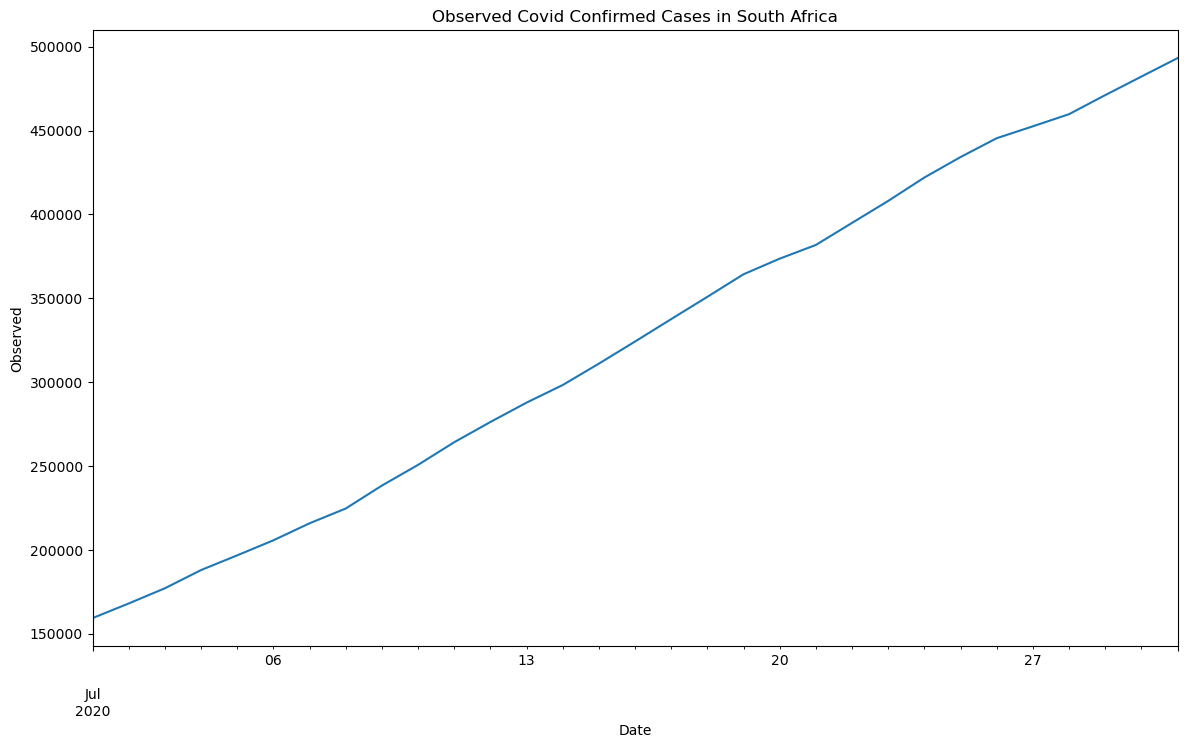

In [84]:
decomposition.observed.plot(title="Observed Covid Confirmed Cases in South Africa", figsize=(14, 8))
plt.ylabel("Observed")
plt.show()

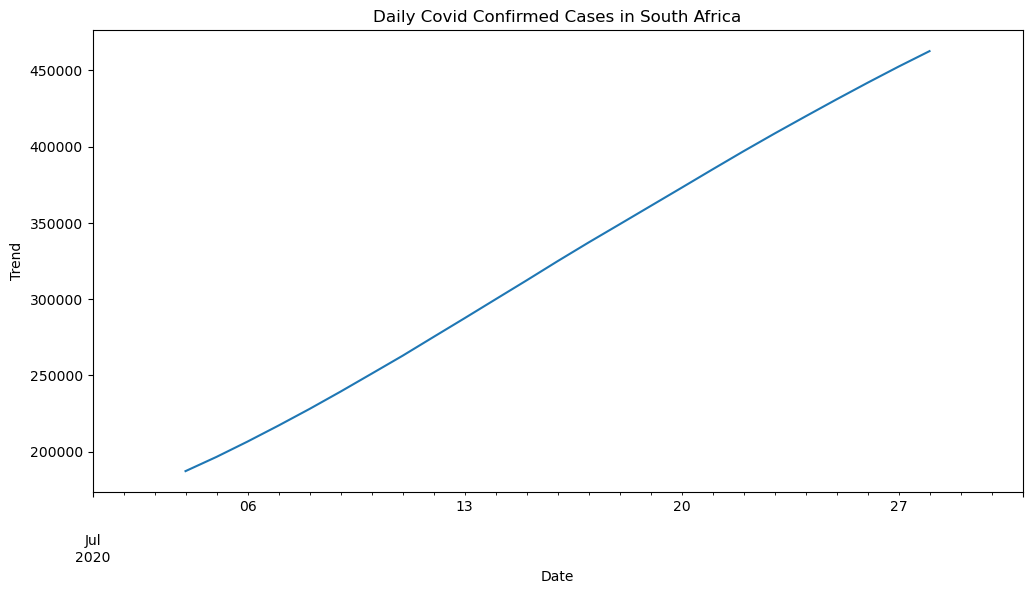

In [85]:
decomposition.trend.plot(title="Daily Covid Confirmed Cases in South Africa",figsize =(12,6))
plt.ylabel("Trend")
plt.show()

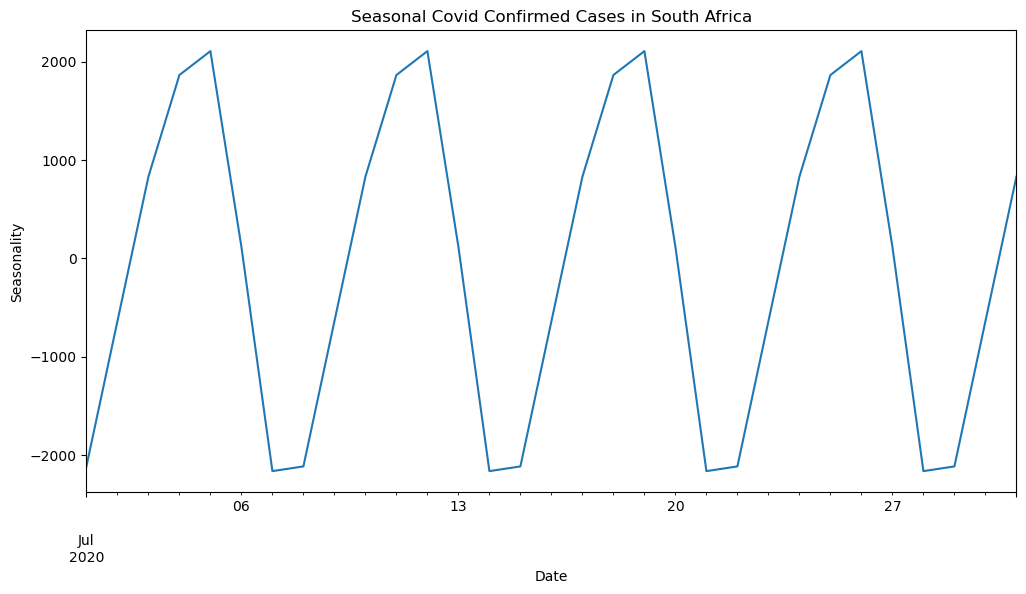

In [86]:
decomposition.seasonal.plot(title="Seasonal Covid Confirmed Cases in South Africa", figsize=(12, 6))
plt.ylabel("Seasonality")
plt.show()

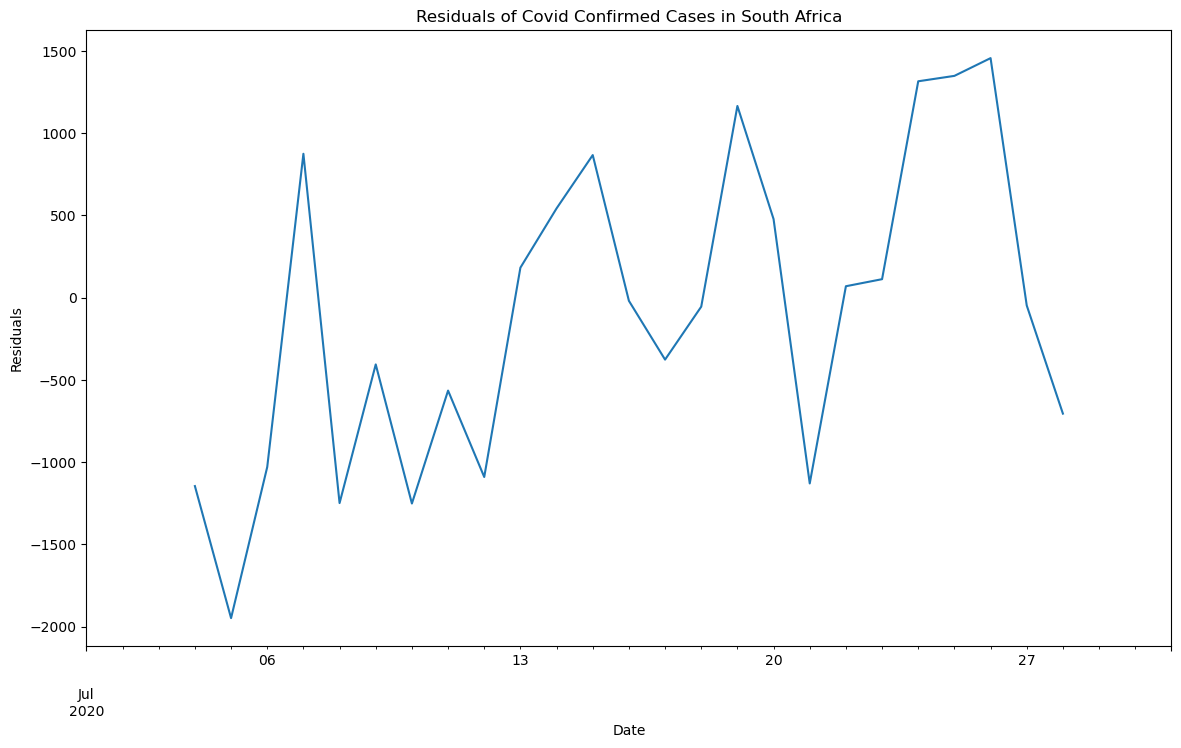

In [58]:
decomposition.resid.plot(title="Residuals of Covid Confirmed Cases in South Africa", figsize=(14, 8))
plt.ylabel("Residuals")
plt.show()


**Stationarity**

In [89]:
from statsmodels.tsa.stattools import adfuller

**Test for Stationarity**
- **Null Hypothesis (H₀)**: The time series is non-stationary (has a unit root).
- **Alternative Hypothesis (H₁)**: The time series is stationary

**Significant Level**
- α = 0.05 (5%)

In [90]:
results = adfuller(south_africa_data_july['Confirmed_Cases'].dropna())
print('p-value:', results[1])

p-value: 3.845930897045735e-06


p-value is less than the signinficant level hence we reject the claim that the data is non stationary

**Correlation**

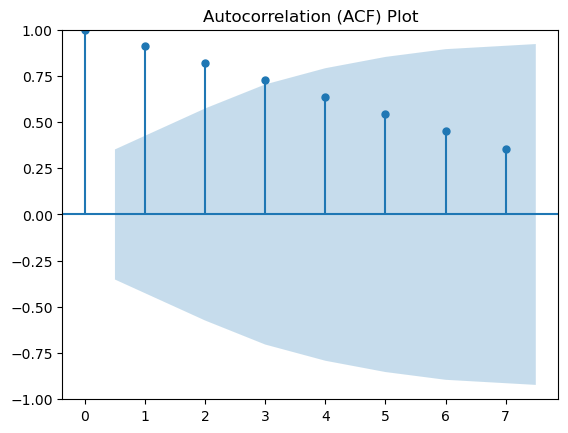

In [91]:
plot_acf(south_africa_data_july, lags=7)
plt.title("Autocorrelation (ACF) Plot")
plt.show()

the strong positive correlation between past and current values suggests that past values have a significant influence on current values.

**Rolling Statistics**

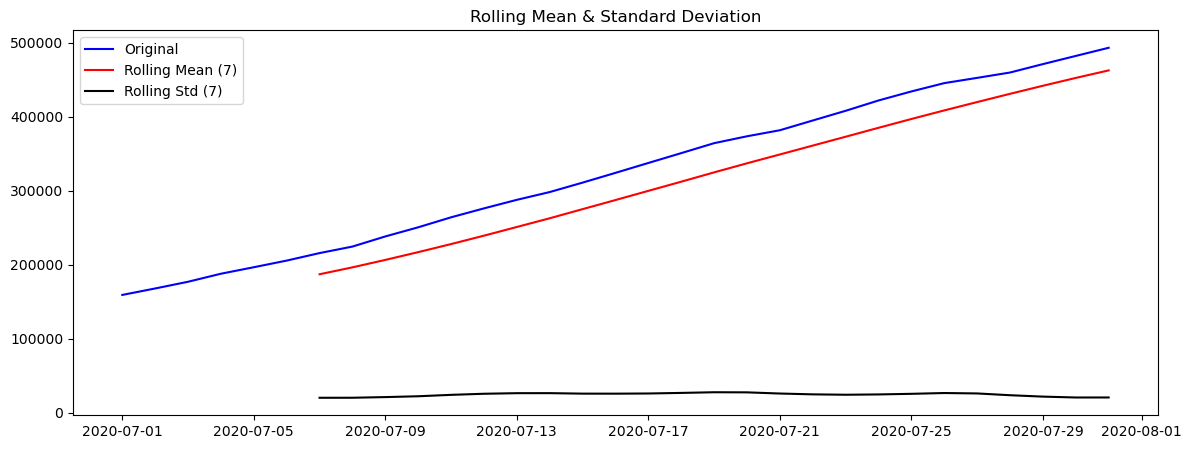

In [94]:
window = 7
rolling_mean = south_africa_data_july.rolling(window=window).mean()
rolling_std = south_africa_data_july.rolling(window=window).std()

plt.figure(figsize=(14,5))
plt.plot(south_africa_data_july, color='blue', label='Original')
plt.plot(rolling_mean, color='red', label=f'Rolling Mean ({window})')
plt.plot(rolling_std, color='black', label=f'Rolling Std ({window})')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.show()


### **Model Building**

In [103]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [95]:
#data splittting
train_size = int(len(south_africa_data) * 0.8)
train_data = south_africa_data[:train_size]
test_data = south_africa_data[train_size:]


**Baseline Model: Linear Regression**

Linear Regression MSE on Training Data: 1329101.05


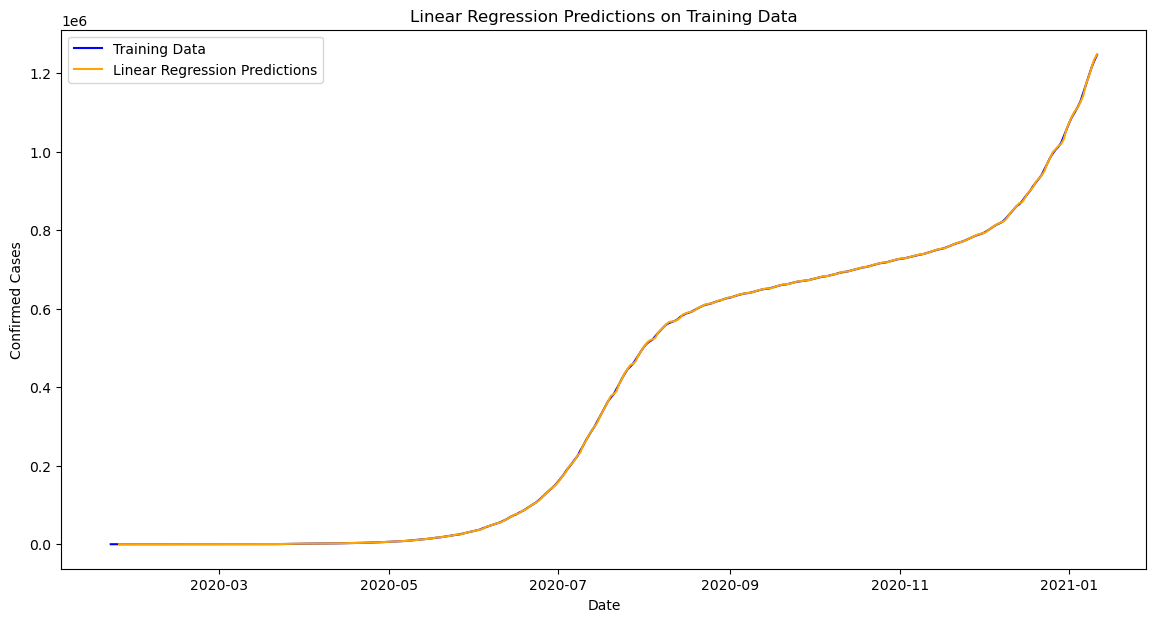

In [105]:
def create_lag_features(series, lags=7):
    df = pd.DataFrame(series)
    for lag in range(1, lags+1):
        df[f'lag_{lag}'] = df[series.name].shift(lag)
    df = df.dropna()
    return df

lagged_train_data = create_lag_features(train_data['Confirmed_Cases'], lags=3)
X_train = lagged_train_data.drop(columns=['Confirmed_Cases'])
y_train = lagged_train_data['Confirmed_Cases']
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_train = linear_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f"Linear Regression MSE on Training Data: {mse_train:.2f}")

##plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Confirmed_Cases'], label='Training Data', color='blue')
plt.plot(lagged_train_data.index, y_pred_train, label='Linear Regression Predictions', color='orange')
plt.title('Linear Regression Predictions on Training Data')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()




**ARIMA MODEL**

c:\Users\pales\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\pales\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\pales\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\pales\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\pales\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA paramete

ARIMA MSE: 50510571837.13337


c:\Users\pales\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


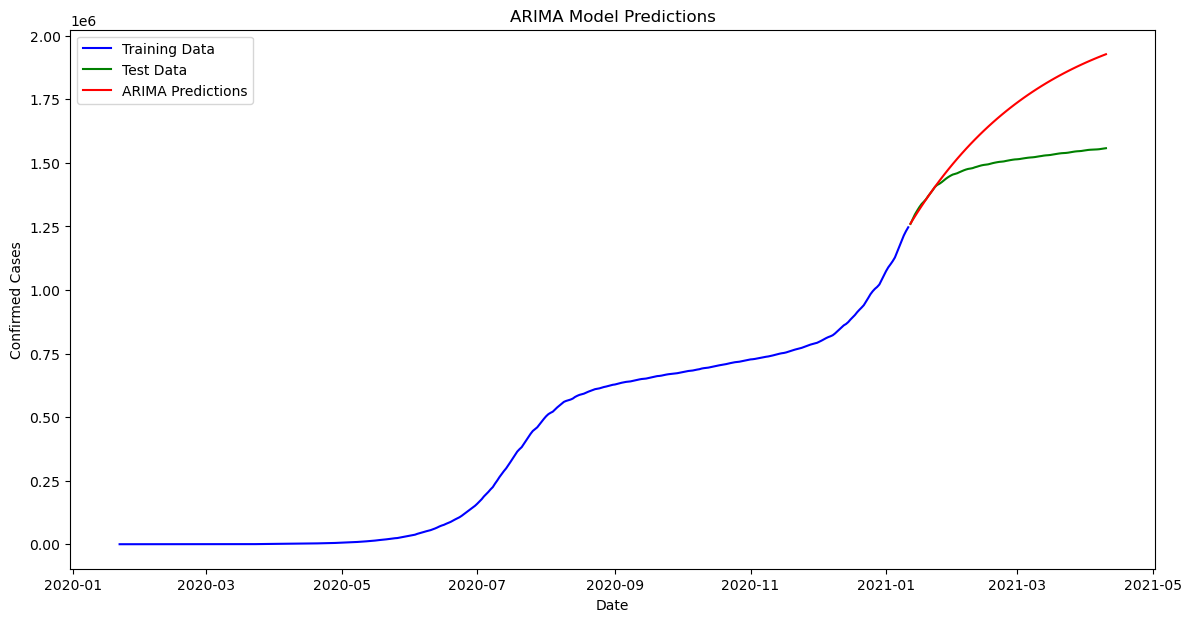

In [106]:
arima_model = ARIMA(train_data, order=(2,1,2))  
arima_fit = arima_model.fit()
arima_pred = arima_fit.forecast(steps=len(test_data))
print("ARIMA MSE:", mean_squared_error(test_data, arima_pred))

plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Confirmed_Cases'], label='Training Data', color='blue')
plt.plot(test_data.index, test_data['Confirmed_Cases'], label='Test Data', color='green')
plt.plot(test_data.index, arima_pred, label='ARIMA Predictions', color='red')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

**SARIMA MODEL**

c:\Users\pales\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\pales\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA MSE: 2392539742710.848


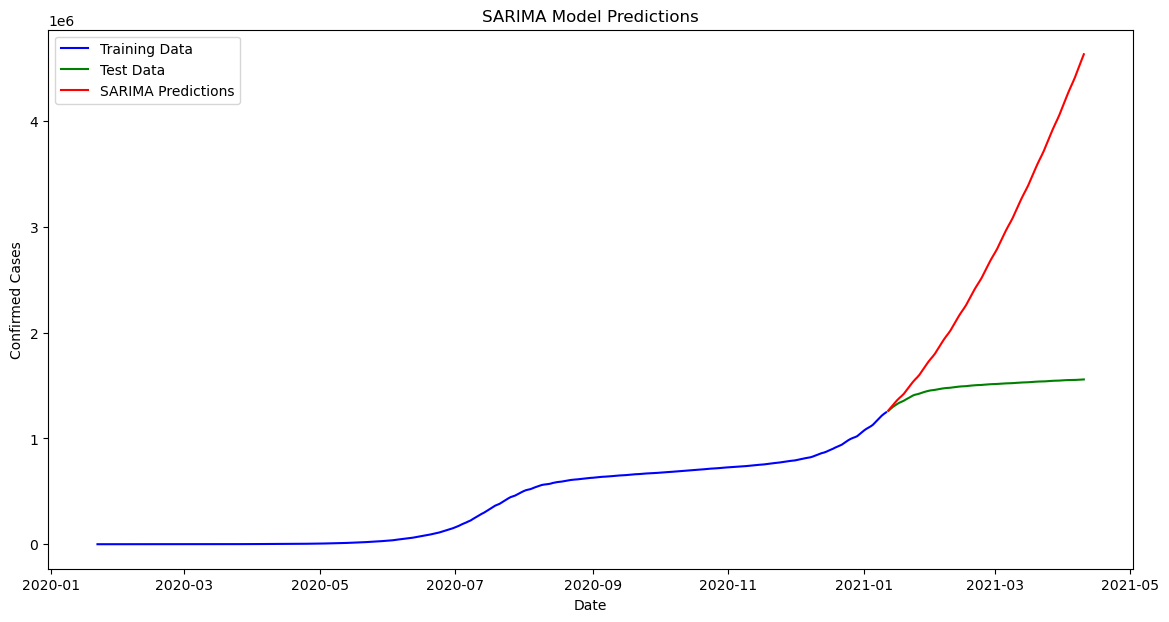

In [107]:
sarima_model = SARIMAX(train_data, order=(2,1,2), seasonal_order=(1,1,1,7))
sarima_fit = sarima_model.fit(disp=False)
sarima_pred = sarima_fit.forecast(steps=len(test_data))
print("SARIMA MSE:", mean_squared_error(test_data, sarima_pred))

plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Confirmed_Cases'], label='Training Data', color='blue')
plt.plot(test_data.index, test_data['Confirmed_Cases'], label='Test Data', color='green')
plt.plot(test_data.index, sarima_pred, label='SARIMA Predictions', color='red')
plt.title('SARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

**Exponential Smooothing Model**

c:\Users\pales\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\pales\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Exponential Smoothing MSE: 301880209000.76465


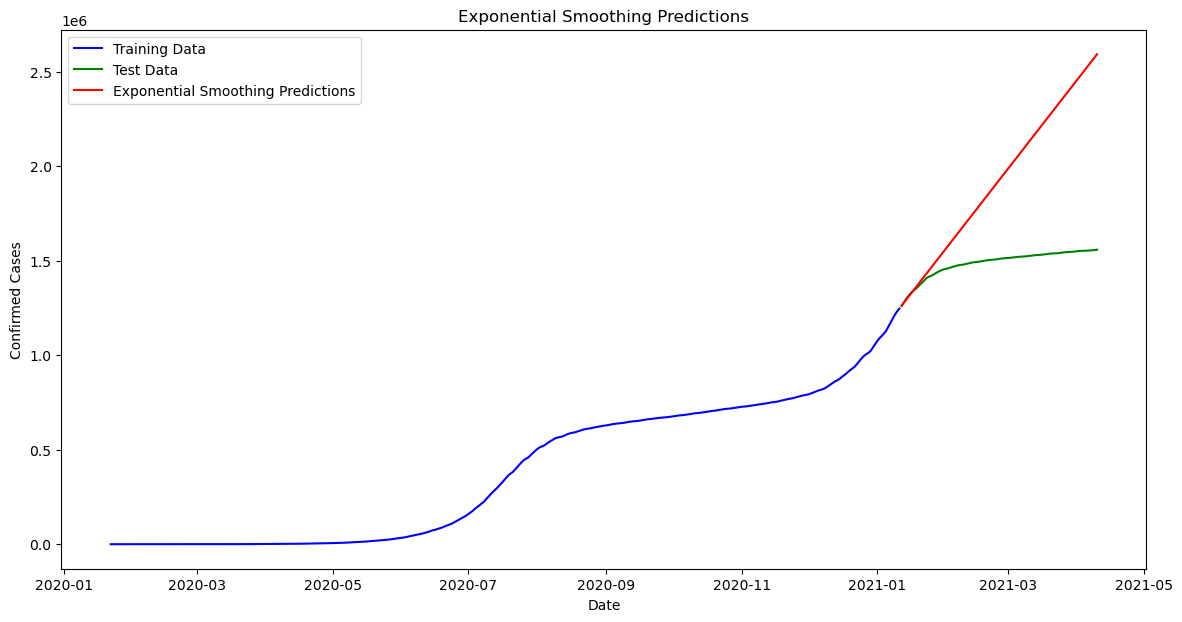

In [108]:
hw_model = ExponentialSmoothing(train_data, trend='add', seasonal="add",seasonal_periods=7)  
hw_fit = hw_model.fit()
hw_pred = hw_fit.forecast(len(test_data))
print("Exponential Smoothing MSE:", mean_squared_error(test_data, hw_pred))

#plot
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Confirmed_Cases'], label='Training Data', color='blue')
plt.plot(test_data.index, test_data['Confirmed_Cases'], label='Test Data', color='green')
plt.plot(test_data.index, hw_pred, label='Exponential Smoothing Predictions', color='red')
plt.title('Exponential Smoothing Predictions')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

**Hyperparameter Tuning for Model**